In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

In [2]:
data = [8.432, 6.077, 8.982, 2.897, 5.784, 29.159, 14.564, 9.869, 11.621, 10.405,
     11.589, 15, 8.659, 15.142, 5.345, 7.69, 16.504, 8.742, 2.834, 9.846,
     13.697, 13.167, 6.846, 6.727, 12.614, 3.655, 19.627, 1.572, 11.4, 8.384,
     4.807, 7.897, 13.881, 6.244, 13.188, 12.419, 8.279, 9.37, 7.233, 15.503,
     13.47, 8.511, 10.134, 18.831, 9.422, 3.715, 8.63, 6.99, 10.187, 17.491,
     8.262, 11.019, 13.02, 7.619, 5.1, 7.757, 7.772, 16.063, 8.736, 12.214,
     7.998, 5.651, 5.225, 8.525, 12.935, 9.312, 5.12, 6.146, 19.032, 15.049,
     9.643, 8.633, 4.367, 3.91, 5.957, 6.345, 14.577, 9.878, 13.658, 4.104,
     5.752, 5.693, 15.207, 6.776, 5.055, 4.96, 35.182, 14.399, 13.383, 14.144,
     3.77, 6.394, 11.695, 8.474, 13.196, 7.636, 11.219, 10.463, 6.802, 10.135]
len(data)

100

In [3]:
alpha = 0.05
#Гипотеза H_0: выборка взята из генеральной совокупности,
#распределённой по закону кси-квадрат

3.973    25
8.774    40
13.576   27
18.377    6
23.178    0
27.980    1
32.781    1


0.25
0.4
0.27
0.06
0.0
0.01
0.01


0.05207
0.08331
0.05623
0.01250
0.00000
0.00208
0.00208


6.37343
11.17486
15.97629
20.77771
25.57914
30.38057
35.18200


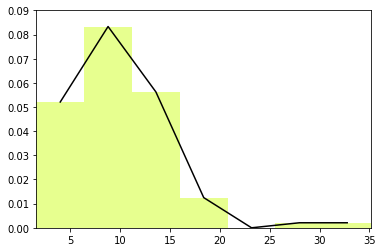

9.969940000000001
25.9183433764
26.180144824646455


In [4]:
from IPython.core.display import display, HTML
#Группировка
min_member = min(data)
max_member = max(data)
display(HTML("<font color='green'>Гистограмма относительных частот</font>"))
selection_range = max_member - min_member
n = math.trunc(1 + 3.32*math.log(len(data), 10))
interval_length = selection_range / n
hist = np.histogram(data, n)
hist_center = [0] * n
for i in range (0, n):
    hist_center[i] = hist[1][i] + interval_length / 2
    print("%-7.3f %3d" % (hist[1][i] + interval_length / 2, hist[0][i]))
display(HTML("<font color='green'>Относительные частоты</font>"))
rel_frequency = [0] * n
for i in range (0, n):
    rel_frequency[i] = hist[0][i] / len(data)
    print(rel_frequency[i])
display(HTML("<font color='green'>Высоты столбцов гистограммы</font>"))
hist_hight = [0] * n
for i in range (0, n): 
    hist_hight[i] = rel_frequency[i] / interval_length
    print("%5.5f" % (hist_hight[i]))
display(HTML("<font color='green'>Границы интервалов</font>"))
borders = [0] * n
for i in range (0, n): 
    borders[i] = hist[1][i] + interval_length
    print("%5.5f" % (borders[i]))
display(HTML("<font color='green'>Гистограмма</font>"))
plt.hist(data, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.plot(hist_center, hist_hight, color = "black")
plt.ylim(0.00, 0.09)
plt.xlim(min_member, max_member)
plt.show()
display(HTML("<font color='green'>Выборочное среднее и выборочная дисперсия</font>"))
sample_mean = np.mean(data)
print(sample_mean)
sample_variance_shift = np.var(data) #смещённая дисперсия
print(sample_variance_shift)
sum = 0
for i in data:
    sum += (i - sample_mean) ** 2
sample_variance = sum / (len(data) - 1) #несмещённая дисперсия
print(sample_variance)

In [5]:
#Для распределения хи-квадрат
#Первый момент = k (находим методом моментов)

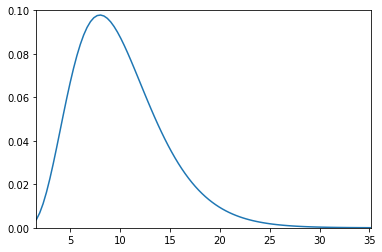

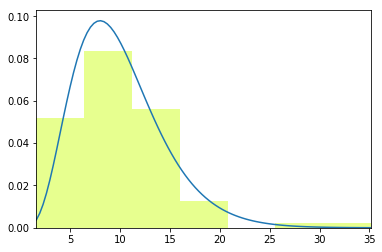

In [6]:
k = sample_mean
x_1 = np.linspace (min_member, max_member, 100) 
plt.plot (x_1, scipy.stats.chi2.pdf (x_1, df = k ))
plt.ylim(0.00, 0.10)
plt.xlim(min_member, max_member)
display(HTML("<font color='green'>График, соответствующий гипотезе H_0:</font>"))
plt.show()
plt.hist(data, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.plot (x_1, scipy.stats.chi2.pdf (x_1, df = k )) 
plt.xlim(min_member, max_member)
display(HTML("<font color='green'>Совмещённый график гистограммы и хи-квадрат распределения с k = 9.96994</font>"))
plt.show()

In [7]:
display(HTML("<font color='green'>Найдём теоретические частоты</font>"))
borders = [min_member] + borders
b0 = [borders[i] for i in range(len(borders) - 1)]
b1 = [borders[i + 1] for i in range(len(borders) - 1)]
teor_frequency = [100 * (scipy.stats.chi2.cdf(x = b1[i], df = k) - scipy.stats.chi2.cdf(x = b0[i], df = k)) for i in range(7)]

frequency = pd.DataFrame({'интервал': b0,'': b1,
                 'Имперические частоты': hist[0],
                 'Теоретические частоты': teor_frequency})
print(frequency)
display(HTML("<font color='green'>Объединим последние три интервала</font>"))
merge1 = np.sum(teor_frequency[4:7]) 
teor_frequency = teor_frequency[0:4] + [merge1]
print(teor_frequency)
display(HTML("<font color='green'>Последняя частота < 5, поэтому объединяем её с предыдущей</font>"))
merge2 = np.sum(teor_frequency[3:5]) 
teor_frequency = teor_frequency[0:3] + [merge2]
print(teor_frequency)
hi_kv_b = [0] * len(teor_frequency)
for i in range(len(teor_frequency)):
    hi_kv_b[i] = ((hist[0][i] - teor_frequency[i]) ** 2) / teor_frequency[i]
display(HTML("<font color='green'>X^2b = </font>"))
print(np.sum(hi_kv_b))
display(HTML("<font color='green'>Число степеней свободы: 4 - 1 - 1</font>"))
m = len(teor_frequency) - 1 - 1
display(HTML("<font color='green'>X^2alpha = </font>"))
print(scipy.stats.chi2.ppf(1 - alpha, m))

    интервал             Имперические частоты  Теоретические частоты
0   1.572000   6.373429                    25              21.786941
1   6.373429  11.174857                    40              43.922088
2  11.174857  15.976286                    27              24.236712
3  15.976286  20.777714                     6               7.682367
4  20.777714  25.579143                     0               1.809727
5  25.579143  30.380571                     1               0.354772
6  30.380571  35.182000                     1               0.061397


[21.786941157009267, 43.92208785754879, 24.23671247374267, 7.682367306610582, 2.225895892490304]


[21.786941157009267, 43.92208785754879, 24.23671247374267, 9.908263199100887]


2.680722333765452


5.991464547107979


In [8]:
display(HTML("<font color='black'>Вывод: Гипотеза H_0: выборка взята из генеральной совокупности, распределённой по закону кси-квадрат </font><font color='red'>принимается </font><font color='black'>на уровне доверия 0,95.</font>")) 